**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

In [2]:
import numpy as np
import pandas as pd 

import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
Variable_Description=pd.DataFrame()
Variable_Description['Name']=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
Variable_Description['Description']= ['Unique Loan ID','Male/ Female','Applicant married (Y/N)',
                                      'Number of dependents','Applicant Education (Graduate/ Under Graduate)',
                                      'Self employed (Y/N)','Applicant income','Coapplicant income',
                                      'Loan amount in thousands','Term of loan in months','credit history meets guidelines',
                                      'Urban/ Semi Urban/ Rural','Loan approved (Y/N) (Target)']
Variable_Description

,Name,Description
0,Loan_ID,Unique Loan ID
1,Gender,Male/ Female
2,Married,Applicant married (Y/N)
3,Dependents,Number of dependents
4,Education,Applicant Education (Graduate/ Under Graduate)
5,Self_Employed,Self employed (Y/N)
6,ApplicantIncome,Applicant income
7,CoapplicantIncome,Coapplicant income
8,LoanAmount,Loan amount in thousands
9,Loan_Amount_Term,Term of loan in months


In [4]:
train=pd.read_csv('train_Loan_prediction.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test=pd.read_csv('test_Loan_prediction.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
# Since Loan ID is unique for every customer it won't play any role in predicting the loan status, hence we can remove this column.
train=train.drop('Loan_ID',axis=1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [12]:
X=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

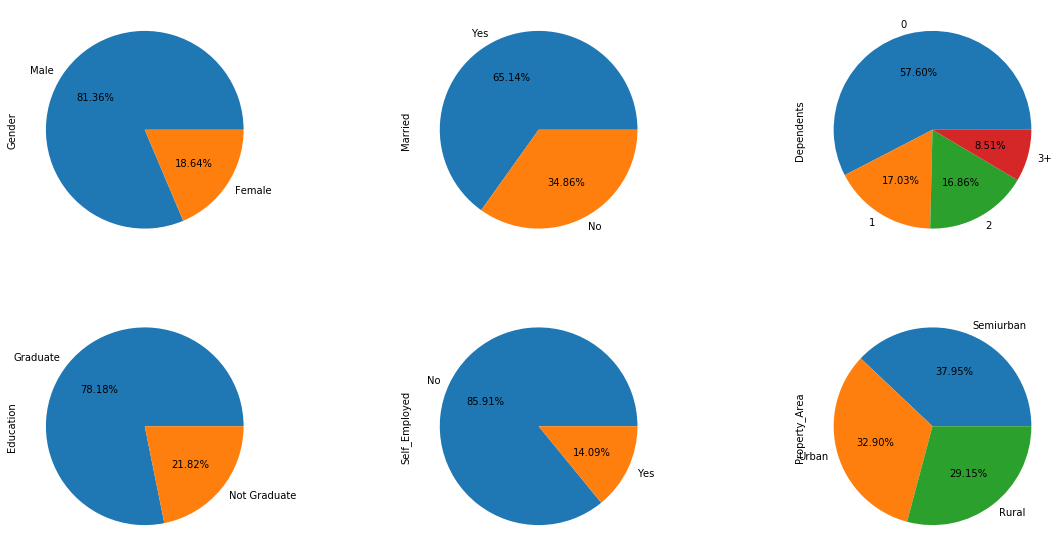

In [13]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()

j=0
for i in train.drop('Loan_Status',axis=1).columns:    
    if train[i].dtype=='O':
        train[i].value_counts().plot(kind='pie',autopct='%.2f%%',ax=axes[j],figsize=(20,10))
        j+=1
        
plt.show()                      

* 81% of the applicats are Male.
* 65% of the applicats are married.
* 57% of the applicants do not have any dependents.
* 78 % of the applicants are graduate.
* Only 14% of applicants are self employed.

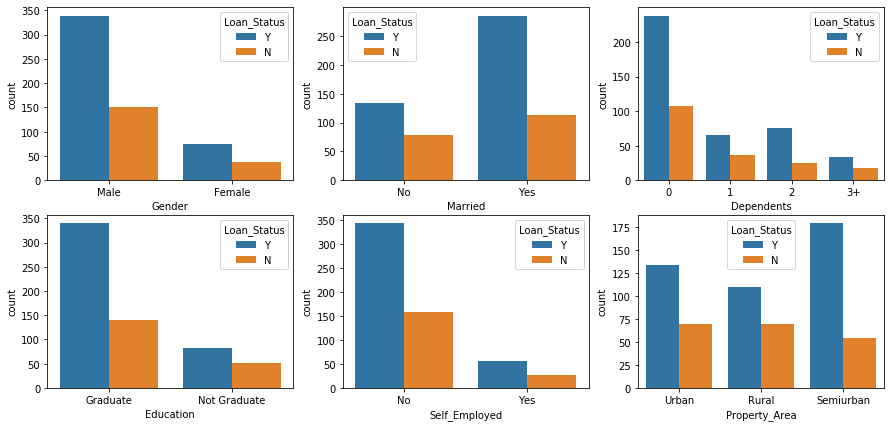

In [14]:
fig, axes = plt.subplots(2, 3, figsize = (15,7))
axes = axes.flatten()

j=0
for i in train.drop('Loan_Status',axis=1).columns:    
    if train[i].dtype=='O':
        sns.countplot(x=train[i],hue=train['Loan_Status'],ax=axes[j])
        j+=1
        
plt.show()

The above graph gives a clear picture of what kind of applicant has more chances of getting a loan. For example married, graduate and with no dependents have a higher chance of getting loan. 

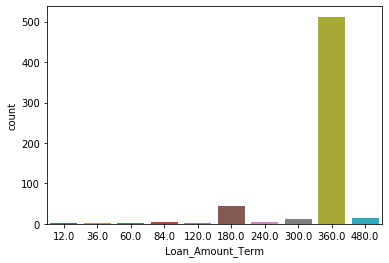

In [15]:
sns.countplot(x=train['Loan_Amount_Term'])
plt.show()

Mostly applicant apply for a loan for the term of 360 months.

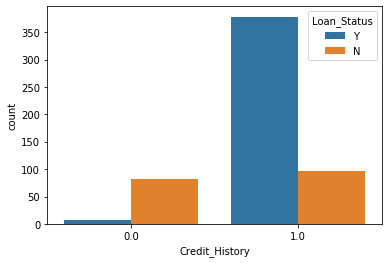

In [16]:
sns.countplot(x=train['Credit_History'],hue=train['Loan_Status'])  
plt.show()

If the credit history meets the gidelines then the chances that a loan is approved is very much higher but not guaranteed.

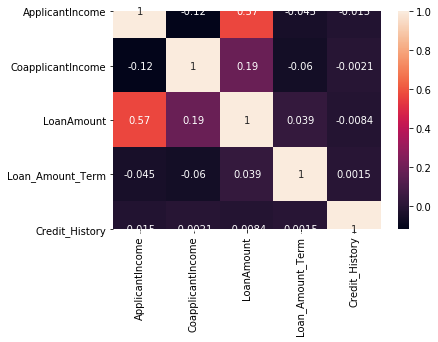

In [17]:
corr=train.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Treating null values

In [18]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [19]:
# Filling null values with random and median values
df['Gender']=df['Gender'].fillna(np.random.choice(df['Gender']))
df['Married']=df['Married'].fillna(np.random.choice(df['Married']))
df['Dependents']=df['Dependents'].fillna(np.random.choice(df['Dependents']))
df['Credit_History']=df['Credit_History'].fillna(np.random.choice(df['Credit_History']))
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.median())

In [20]:
df.groupby('Self_Employed').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,,,,,
No,3708,1213.0,125.0,360.0,1.0
Yes,5503,0.0,139.5,360.0,1.0


We can see that self employed people have higher applicant income and very low/no coapplicant income where as people who are not self employed have lower applicant income  and higher coapplicant income. So we can fill the null values of 'Self_Employed' by using this information.


In [21]:
df.loc[(df['ApplicantIncome']<4758) & (df['CoapplicantIncome']>=646),'Self_Employed']=df.loc[(df['ApplicantIncome']<4758) & (df['CoapplicantIncome']>=646),'Self_Employed'].fillna('No')
df.loc[(train['ApplicantIncome']>=4758) & (df['CoapplicantIncome']<646),'Self_Employed']=df.loc[(df['ApplicantIncome']>=4758) & (df['CoapplicantIncome']<646),'Self_Employed'].fillna('Yes')

In [22]:
df['Self_Employed'].isnull().sum()

19

In [23]:
# The rest of the null values can be filled with random values
df['Self_Employed']=df['Self_Employed'].fillna(np.random.choice(df['Self_Employed']))

In [24]:
df['Self_Employed'].isnull().sum()

0

In [25]:
corr=df.corr()
corr['LoanAmount']
# Since Loan amount have highest correlation with ApplicantIncome we will fill the null values with these

ApplicantIncome      0.551811
CoapplicantIncome    0.179228
LoanAmount           1.000000
Loan_Amount_Term     0.053779
Credit_History      -0.003637
Name: LoanAmount, dtype: float64

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=0)

# New data frame without null values of loan amount
train_without_null=df[['LoanAmount','ApplicantIncome','CoapplicantIncome']].dropna()
X_train=train_without_null[['ApplicantIncome','CoapplicantIncome']]
y_train=train_without_null['LoanAmount']


# applying model
rf.fit(X_train,y_train)

# Predicting on the whole data set and saving it as a new column
df['LoanAmount_pred']=pd.DataFrame(rf.predict(df[['ApplicantIncome','CoapplicantIncome']]))

In [27]:
# Replacing only the null values with the predicted values 
df['LoanAmount'].fillna(df['LoanAmount_pred'],inplace=True)

In [28]:
from sklearn.metrics import r2_score
r2_score(df['LoanAmount'],df['LoanAmount_pred'])

0.893156349103371

In [29]:
df.drop('LoanAmount_pred',axis=1,inplace=True)

In [30]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [31]:
# We convert the dependents column to integer value and change 3+ to 3
df['Dependents']=df['Dependents'].replace('3+',3).astype('int64')

In [32]:
# Checking for the columns whose skewness lies outside -0.5 and +0.5.
df.skew()[abs(df.skew())>0.5]

Dependents           0.876292
ApplicantIncome      7.086961
CoapplicantIncome    6.844109
LoanAmount           2.707963
Loan_Amount_Term    -2.513729
Credit_History      -1.953899
dtype: float64

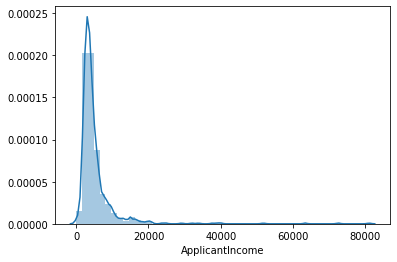

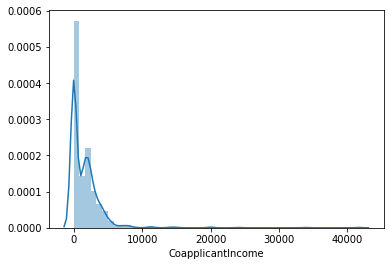

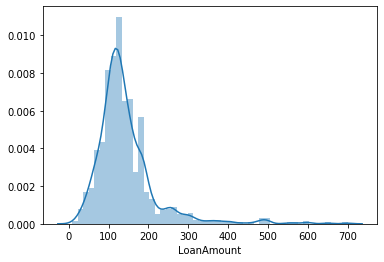

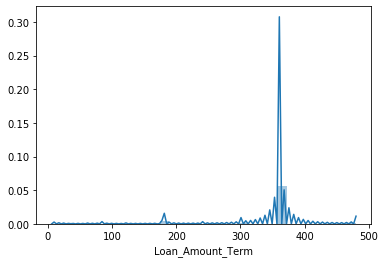

In [33]:
# Distribution of highly skewed numerical features.
for i in ['ApplicantIncome' ,'CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    sns.distplot(df[i])
    plt.show()

To remove/reduce the skewness we can do suitable transformations. Here we will be using boxcox transformation.

In [34]:
# To use boxcox the data must be positive, so we check if the minimum values is less than 0 or not
for i in  ['ApplicantIncome' ,'CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    if df[i].min()<=0:
        print(i)
    

ApplicantIncome
CoapplicantIncome


In [35]:
# Since 'ApplicantIncome' and 'CoapplicantIncome' have 0 value we make the minimum value to 1
df['ApplicantIncome']=(df['ApplicantIncome']-df['ApplicantIncome'].min()+1)
df['CoapplicantIncome']=(df['CoapplicantIncome']-df['CoapplicantIncome'].min()+1)

In [36]:
# Now we apply boxcox to the skewed columns
from scipy import stats 
from scipy.stats import boxcox
lambdas={}
for i in ['ApplicantIncome' ,'CoapplicantIncome','LoanAmount','Loan_Amount_Term']:
    df[i],lambdas[i]=stats.boxcox(df[i])
    

### Splitting back into train and test

In [37]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
df=df.drop('Loan_ID',axis=1)

In [40]:
df=pd.get_dummies(df,drop_first=True)

In [41]:
train=df.iloc[0:614,:]
test=df.iloc[614:,:]


In [42]:
X_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

In [43]:
X_test=test.drop('Loan_Status',axis=1)
y_test=test['Loan_Status']

In [44]:
# Checking if the data is balanced or not
train['Loan_Status'].value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

## In order to handle imbalanced data, perform SMOTE

In [45]:
# ! pip install imblearn

In [46]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

In [47]:
print('Before')
print()
print(y.value_counts())

print('After')
print()
print(y_train_smote.value_counts())


Before

Y    422
N    192
Name: Loan_Status, dtype: int64
After

0.0    422
1.0    422
Name: Loan_Status, dtype: int64


In [48]:
#split into 70:30 ratio 
X_train_sm, X_val_sm, y_train_sm, y_val_sm = train_test_split(X_train_smote, y_train_smote, test_size = 0.3, random_state = 0)

### Applying different models

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


models = []

models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('GBoost',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))



In [50]:
from sklearn.model_selection import cross_val_score

cv_scores={}
for name, model in models:
    cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy',n_jobs=-1)
    cv_scores[name]="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

{'LR': '0.500000 (0.002646)',
 'CART': '0.763109 (0.038185)',
 'RFC': '0.815230 (0.061743)',
 'KNN': '0.746471 (0.036579)',
 'XGBoost': '0.806875 (0.049999)',
 'GBoost': '0.798669 (0.065291)',
 'ADA': '0.778487 (0.045109)'}

As the best accuracy is given by random forest we apply hyperparameter tuning on these.

In [51]:
# Hyper parameter tuninig for random forest
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
params= {'n_estimators':sp_randint(0,30),
         'max_depth':sp_randint(2,8),
        'min_samples_split':sp_randint(5,20)} 
rsearch= RandomizedSearchCV(RFC,param_distributions=params,cv=3,scoring='accuracy',n_jobs=-1)
rsearch.fit(X_train_smote,y_train_smote)
rsearch.best_params_

{'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 26}

In [52]:
model = RandomForestClassifier(**rsearch.best_params_)
model.fit(X_train_smote, y_train_smote)
y_pred_RFC_H= model.predict(X_test)

In [53]:
cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy',n_jobs=-1)
cv_scores="%f (%f)" % (cv_results.mean(), cv_results.std())
cv_scores

'0.796302 (0.069302)'

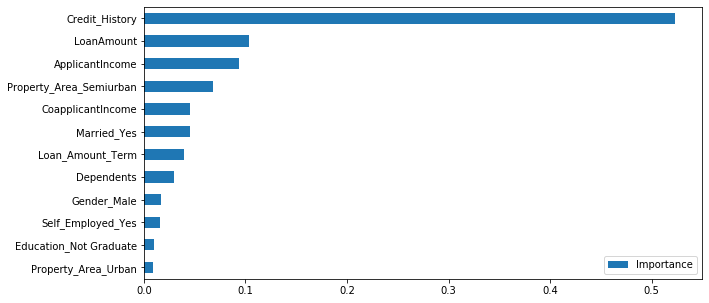

In [54]:
# Feature Importances_
imp = pd.DataFrame(model.feature_importances_, columns=["Importance"])
imp.index = X_train_smote.columns
imp=imp.sort_values(by='Importance', ascending=True)
imp.plot(kind='barh',figsize=(10,5))
plt.show()